<a href="https://colab.research.google.com/github/AnJiye/Fitness_model/blob/master/squat_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_stand = pd.read_csv('/content/drive/MyDrive/fitness_data/squat/data_squat_stand.csv')
df_sit = pd.read_csv('/content/drive/MyDrive/fitness_data/squat/data-squat_sit.csv')
df_wrong = pd.read_csv('/content/drive/MyDrive/fitness_data/squat/data_squat_wrong.csv')

In [4]:
df_squat = pd.concat([df_stand, df_sit, df_wrong])
# df_squat.head(5)
df_squat

,nose_x,nose_y,leftEye_x,leftEye_y,rightEye_x,rightEye_y,leftEar_x,leftEar_y,rightEar_x,rightEar_y,leftShoulder_x,leftShoulder_y,rightShoulder_x,rightShoulder_y,leftElbow_x,leftElbow_y,rightElbow_x,rightElbow_y,leftWrist_x,leftWrist_y,rightWrist_x,rightWrist_y,leftHip_x,leftHip_y,rightHip_x,rightHip_y,leftKnee_x,leftKnee_y,rightKnee_x,rightKnee_y,leftAnkle_x,leftAnkle_y,rightAnkle_x,rightAnkle_y,label
0,360,98,367,89,349,91,379,99,339,100,394,147,318,142,409,172,295,167,380,170,351,152,379,298,320,300,384,405,311,393,385,494,297,476,1
1,365,99,373,90,355,91,383,101,341,100,399,151,314,145,418,191,300,166,371,169,362,165,383,298,322,299,387,405,313,396,383,494,297,479,1
2,357,99,365,90,347,92,378,99,336,101,393,153,317,149,415,184,296,175,368,171,350,166,378,298,318,298,390,404,309,401,385,494,294,481,1
3,355,100,363,90,345,92,376,97,334,100,390,151,315,149,415,184,296,176,367,172,345,169,377,300,319,301,390,406,306,403,385,495,295,478,1
4,354,100,363,90,344,93,375,98,334,101,391,152,316,149,415,180,297,175,370,174,352,168,379,291,319,301,390,409,308,402,385,495,295,481,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,313,338,324,326,301,329,340,323,277,327,349,358,257,366,404,373,244,385,346,384,267,377,338,425,271,421,401,434,206,458,387,538,228,525,3
206,304,329,316,316,291,317,329,315,270,319,350,340,264,357,392,373,253,383,347,374,278,380,342,411,275,410,399,435,202,453,385,539,226,522,3
207,302,322,315,312,290,308,328,313,271,309,346,341,261,347,385,366,196,407,332,368,0,0,336,422,274,420,402,439,211,453,385,540,229,522,3
208,304,301,313,290,289,289,325,296,269,294,343,341,257,334,389,339,200,338,348,339,0,0,331,424,274,412,398,436,209,455,384,537,227,525,3


In [5]:
df_squat=df_squat.sample(frac=1).reset_index(drop=True)
df_squat

,nose_x,nose_y,leftEye_x,leftEye_y,rightEye_x,rightEye_y,leftEar_x,leftEar_y,rightEar_x,rightEar_y,leftShoulder_x,leftShoulder_y,rightShoulder_x,rightShoulder_y,leftElbow_x,leftElbow_y,rightElbow_x,rightElbow_y,leftWrist_x,leftWrist_y,rightWrist_x,rightWrist_y,leftHip_x,leftHip_y,rightHip_x,rightHip_y,leftKnee_x,leftKnee_y,rightKnee_x,rightKnee_y,leftAnkle_x,leftAnkle_y,rightAnkle_x,rightAnkle_y,label
0,323,295,332,283,309,285,346,287,293,290,368,322,284,329,402,327,257,338,368,334,301,329,0,0,0,0,407,424,288,443,393,498,263,475,2
1,323,282,333,271,312,273,347,277,295,277,367,314,281,308,399,332,256,319,359,329,306,323,0,0,294,430,408,411,258,402,394,495,266,480,2
2,295,349,302,333,281,341,313,330,263,346,346,350,253,391,387,393,220,420,337,406,289,401,372,433,290,507,422,438,263,473,399,526,242,528,3
3,311,293,320,280,300,283,331,281,281,287,349,312,275,330,381,338,232,338,332,338,231,340,343,399,290,424,413,422,244,398,406,520,238,507,3
4,348,91,357,81,335,84,373,94,324,98,393,151,306,153,415,173,284,166,355,166,310,176,376,319,311,322,388,422,298,429,404,522,271,518,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,312,317,323,306,301,307,339,305,287,308,361,336,275,337,391,374,243,366,344,365,298,364,350,411,296,410,412,436,231,443,411,528,234,516,2
656,300,321,304,306,286,315,315,309,265,329,339,349,263,371,387,362,237,393,329,365,303,374,356,425,287,443,422,435,232,444,409,532,245,520,3
657,340,94,349,86,328,86,362,94,315,97,385,152,294,152,416,176,276,172,380,180,310,182,371,319,301,317,383,416,290,423,389,516,268,506,1
658,315,306,326,296,303,296,339,295,285,299,360,337,269,334,390,359,241,356,347,348,292,354,353,413,289,413,409,446,233,449,411,536,244,523,2


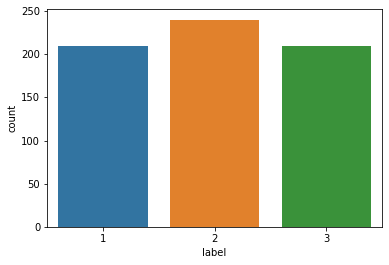

In [6]:
sns.countplot(x=df_squat['label'])

In [7]:
print(df_squat.isnull().sum())

nose_x             0
nose_y             0
leftEye_x          0
leftEye_y          0
rightEye_x         0
rightEye_y         0
leftEar_x          0
leftEar_y          0
rightEar_x         0
rightEar_y         0
leftShoulder_x     0
leftShoulder_y     0
rightShoulder_x    0
rightShoulder_y    0
leftElbow_x        0
leftElbow_y        0
rightElbow_x       0
rightElbow_y       0
leftWrist_x        0
leftWrist_y        0
rightWrist_x       0
rightWrist_y       0
leftHip_x          0
leftHip_y          0
rightHip_x         0
rightHip_y         0
leftKnee_x         0
leftKnee_y         0
rightKnee_x        0
rightKnee_y        0
leftAnkle_x        0
leftAnkle_y        0
rightAnkle_x       0
rightAnkle_y       0
label              0
dtype: int64


In [8]:
x_data = df_squat.drop(columns=['label'], axis=1)
x_data.head(5)

,nose_x,nose_y,leftEye_x,leftEye_y,rightEye_x,rightEye_y,leftEar_x,leftEar_y,rightEar_x,rightEar_y,leftShoulder_x,leftShoulder_y,rightShoulder_x,rightShoulder_y,leftElbow_x,leftElbow_y,rightElbow_x,rightElbow_y,leftWrist_x,leftWrist_y,rightWrist_x,rightWrist_y,leftHip_x,leftHip_y,rightHip_x,rightHip_y,leftKnee_x,leftKnee_y,rightKnee_x,rightKnee_y,leftAnkle_x,leftAnkle_y,rightAnkle_x,rightAnkle_y
0,323,295,332,283,309,285,346,287,293,290,368,322,284,329,402,327,257,338,368,334,301,329,0,0,0,0,407,424,288,443,393,498,263,475
1,323,282,333,271,312,273,347,277,295,277,367,314,281,308,399,332,256,319,359,329,306,323,0,0,294,430,408,411,258,402,394,495,266,480
2,295,349,302,333,281,341,313,330,263,346,346,350,253,391,387,393,220,420,337,406,289,401,372,433,290,507,422,438,263,473,399,526,242,528
3,311,293,320,280,300,283,331,281,281,287,349,312,275,330,381,338,232,338,332,338,231,340,343,399,290,424,413,422,244,398,406,520,238,507
4,348,91,357,81,335,84,373,94,324,98,393,151,306,153,415,173,284,166,355,166,310,176,376,319,311,322,388,422,298,429,404,522,271,518


In [9]:
y_data = df_squat[['label']]
y_data.head(5)

,label
0,2
1,2
2,3
3,3
4,1


In [10]:
df_squat.shape

(660, 35)

In [11]:
# 데이터 표준화
scalar = StandardScaler()
x_data_scaled = scalar.fit_transform(x_data)

print(x_data.values[0])
print(x_data_scaled[0])

[323 295 332 283 309 285 346 287 293 290 368 322 284 329 402 327 257 338
 368 334 301 329   0   0   0   0 407 424 288 443 393 498 263 475]
[ 3.25502270e-03  4.24674465e-01 -2.75806821e-03  4.21602023e-01
 -5.87275206e-02  4.24661818e-01  2.85401926e-03  4.54388572e-01
 -5.10290358e-02  4.35721984e-01  4.57215977e-02  4.29677707e-01
  1.66622244e-01  4.18747484e-01  1.58199424e-01  2.10090561e-01
  2.44938496e-01  3.17927039e-01  3.76694456e-01  4.46581410e-01
  2.17191932e-01  2.86396092e-01 -3.74030380e+00 -3.23037127e+00
 -2.97164656e+00 -2.63179258e+00  2.84638482e-01  1.88618463e-01
  6.54186279e-01  3.92727255e-01  2.82032346e-01  1.57174394e-01
  5.10642031e-01  2.45315531e-01]


In [12]:
# One-hot encoding
encoder = OneHotEncoder()
y_data_encoded = encoder.fit_transform(y_data).toarray()

print(y_data.values[0])
print(y_data_encoded[0])

[2]
[0. 1. 0.]


In [13]:
# 학습/검증 데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x_data_scaled, y_data_encoded, test_size=0.2, random_state=2021)
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(528, 34) (132, 34)
(528, 3) (132, 3)


In [14]:
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, test_size=0.2, random_state=2021)
print(x_val.shape, x_test.shape)
print(y_val.shape, y_test.shape)

(105, 34) (27, 34)
(105, 3) (27, 3)


In [15]:
model = Sequential([
  Dense(10, input_shape=(34,), activation='relu'),
  Dense(10, activation='relu'),
  Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.02), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                350       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 493
Trainable params: 493
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    batch_size = 50, epochs = 50, verbose = 1
)

Epoch 1/50
11/11 [==============================] - 1s 21ms/step - loss: 0.5661 - accuracy: 0.7424 - val_loss: 0.3978 - val_accuracy: 0.8000
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 0.3379 - accuracy: 0.8352 - val_loss: 0.3187 - val_accuracy: 0.9048
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 0.2752 - accuracy: 0.8617 - val_loss: 0.2939 - val_accuracy: 0.9143
Epoch 4/50
11/11 [==============================] - 0s 6ms/step - loss: 0.2109 - accuracy: 0.9299 - val_loss: 0.2787 - val_accuracy: 0.9048
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1804 - accuracy: 0.9394 - val_loss: 0.2479 - val_accuracy: 0.9238
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1598 - accuracy: 0.9413 - val_loss: 0.2236 - val_accuracy: 0.9238
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 0.1396 - accuracy: 0.9451 - val_loss: 0.2390 - val_accuracy: 0.9238
Epoch 8/50
11/11 [=

In [17]:
model.evaluate(x_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1194 - accuracy: 0.9259 - 16ms/epoch - 16ms/step


[0.11939706653356552, 0.9259259104728699]

In [18]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp7cltz2zv/assets


In [19]:
with open('./squat_model.tflite', 'wb') as f:
  f.write(tflite_model)